# Bankruptcy Prediction using Financial Indicators

## 1. Introduction

### Problem Overview
Financial bankruptcy can severely impact investors, creditors, employees, and the overall economy. Accurately predicting bankruptcy ahead of time enables companies and stakeholders to take preventive measures and make informed decisions.

This challenge focuses on using machine learning techniques to predict whether a company is likely to go bankrupt based on its historical financial indicators.

### Why Is Bankruptcy Prediction Important?
- **Risk Mitigation:** Helps financial institutions and investors assess and minimize risk.
- **Early Intervention:** Companies can restructure operations before reaching insolvency.
- **Improved Decision-Making:** Enables more accurate credit scoring and loan approvals.
- **Economic Stability:** Reduces the systemic risk of widespread corporate failures.

### Dataset Description
- **Source:** [UCI Machine Learning Repository - Polish Companies Bankruptcy Data](http://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data)
- **Data Span:** 5 years of historical financial information from Polish companies.
- **Features:** 
  - 64 numerical financial indicators (e.g., profitability ratios, debt ratios)
- **Target Variable:**
  - `0` → Non-bankrupt  
  - `1` → Bankrupt

The dataset is structured to reflect real-world scenarios where a balanced, data-driven approach is necessary for robust financial forecasting.

## 2. Install All Required Libraries

In [34]:
!pip install ucimlrepo xgboost seaborn matplotlib scikit-learn pandas numpy imblearn


   ---------------------------------------- 0/3 [sklearn-compat]
   ---------------------------------------- 0/3 [sklearn-compat]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn

## 3. Neccessary Imports

In [52]:
# Data Loading & EDA 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Source
from ucimlrepo import fetch_ucirepo

# ML Models and Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel

# Misc
import warnings
warnings.filterwarnings('ignore')

# Plotting style
sns.set(style="whitegrid")

## 4. Data Loading

In [24]:
# Fetch dataset from UCI Machine Learning Repository
polish_companies_bankruptcy = fetch_ucirepo(id=365)

# Extract features and target
X = polish_companies_bankruptcy.data.features
y = polish_companies_bankruptcy.data.targets

# Display metadata and variables (optional but useful for exploration)
print("Metadata:")
print(polish_companies_bankruptcy.metadata)

print("\nVariable Information:")
print(polish_companies_bankruptcy.variables)


# Preview the data
print("\nFeature Data (X):")
display(X.head())

print("\nTarget Data (y):")
display(y.head())

# Check the shape of the data
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")


Metadata:
{'uci_id': 365, 'name': 'Polish Companies Bankruptcy', 'repository_url': 'https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data', 'data_url': 'https://archive.ics.uci.edu/static/public/365/data.csv', 'abstract': 'The dataset is about bankruptcy prediction of Polish companies.The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 10503, 'num_features': 65, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2016, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C5F600', 'creators': ['Sebastian Tomczak'], 'intro_paper': {'ID': 417, 'type': 'NATIVE', 'title': 'Ensemble boosted trees with synthetic features generation in application to bankruptcy

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,A42,A43,A44,A45,A46,A47,A48,A49,A50,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
0,1,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,0.249760,0.65980,0.166600,0.249760,497.42,0.73378,2.6349,0.249760,0.149420,43.370,1.2479,0.21402,0.119980,0.47706,0.50494,0.60411,1.45820,1.7615,5.9443,0.11788,0.149420,94.14,3.8772,0.56393,0.21402,1.7410,593.2700,0.50591,0.128040,0.662950,0.051402,0.128040,114.42,71.050,1.00970,1.52250,49.394,0.185300,0.110850,2.0420,0.37854,0.25792,2.2437,2.2480,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
1,1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,0.261140,0.51680,0.158350,0.258340,677.96,0.53838,2.0005,0.258340,0.152000,87.981,1.4293,0.24806,0.123040,NaN,0.39542,0.43992,88.44400,16.9460,3.6884,0.26969,0.152000,122.17,2.9876,2.98760,0.20616,1.6996,NaN,0.49788,0.121300,0.086422,0.064371,0.145950,199.49,111.510,0.51045,1.12520,100.130,0.237270,0.139610,1.9447,0.49988,0.33472,17.8660,17.8660,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870
2,1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,0.312580,0.64184,0.244350,0.309060,794.16,0.45961,1.4369,0.309060,0.236100,73.133,1.4283,0.30260,0.189960,NaN,0.28932,0.37282,86.01100,1.0627,4.3749,0.41929,0.238150,176.93,2.0630,1.42740,0.31565,1.3090,2.3019,0.51537,0.241140,0.322020,0.074020,0.231170,165.51,92.381,0.94807,1.01010,96.372,0.291810,0.222930,1.0758,0.48152,0.48474,1.2098,2.0504,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078
3,1,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,1.5069,0.11550,0.062782,0.17193,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.11550,1.3562,NaN,0.57353,0.088995,0.401390,0.069622,0.088995,180.77,100.980,0.28720,1.56960,84.344,0.085874,0.066165,2.4928,0.30734,0.25033,2.4524,2.4524,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497
4,1,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,0.187320,0.33147,0.121820,0.187320,1133.20,0.32211,1.6307,0.187320,0.115530,57.045,NaN,0.19832,0.115530,0.18732,0.38677,0.32211,1.41380,1.1184,4.1424,0.27884,0.115530,147.04,2.4823,0.32340,0.19832,1.6278,11.2470,0.43489,0.122310,0.293040,0.096680,0.122310,141.62,84.574,0.73919,0.95787,65.936,0.188110,0.116010,1.2959,0.56511,0.40285,1.8839,2.1184,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980



Target Data (y):


,class
0,0
1,0
2,0
3,0
4,0



Features shape: (43405, 65)
Target shape: (43405, 1)


## 5. Exploratory Data Analysis


Class Distribution in Target Variable:
class
0        41314
1         2091
dtype: int64
class
0        0.951826
1        0.048174
dtype: float64


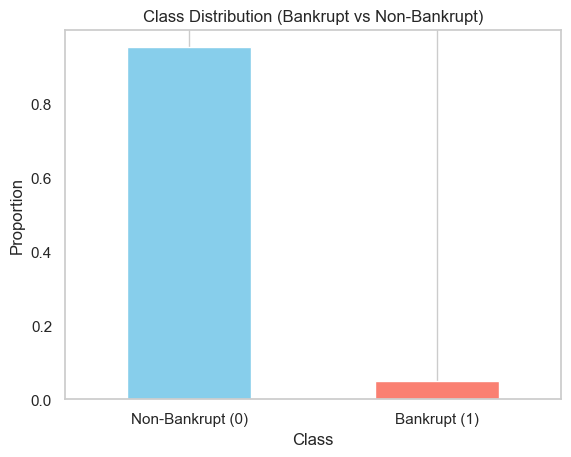

In [38]:
print("\nClass Distribution in Target Variable:")
print(y.value_counts())
print(y.value_counts(normalize=True))

y.value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution (Bankrupt vs Non-Bankrupt)")
plt.xticks(ticks=[0, 1], labels=["Non-Bankrupt (0)", "Bankrupt (1)"], rotation=0)
plt.ylabel("Proportion")
plt.xlabel("Class")
plt.grid(axis='y')
plt.show()


Correlation heatmap to identify strongly correlated features.


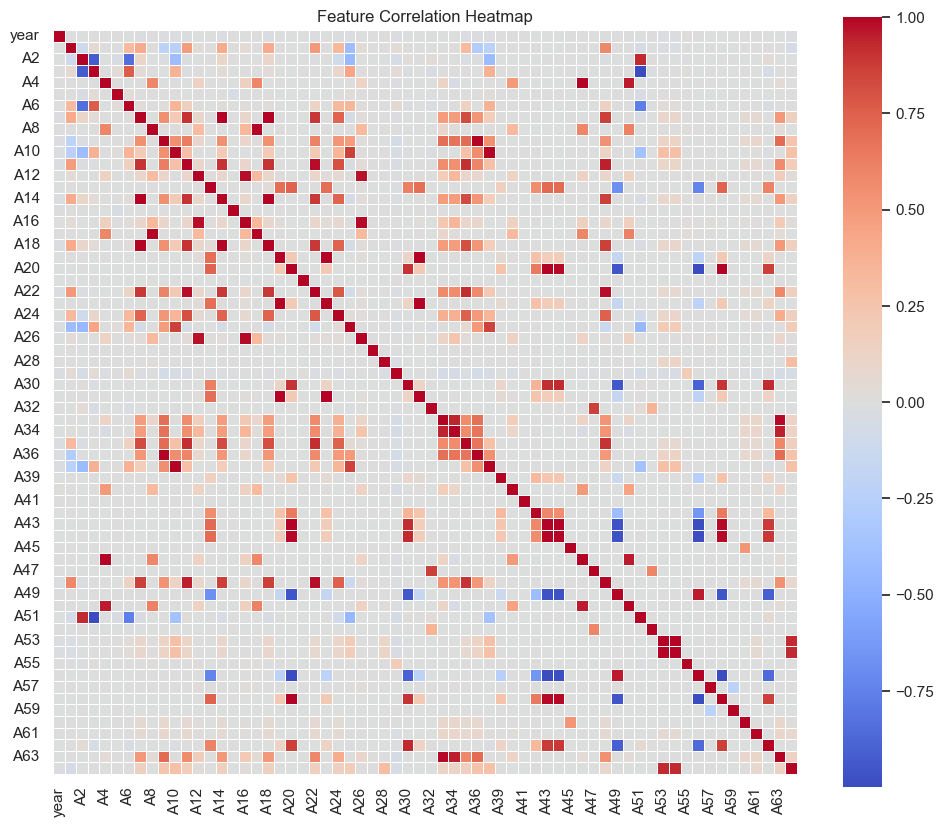

In [37]:
print("\nCorrelation heatmap to identify strongly correlated features.")
corr = X.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0, square=True, linewidths=.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [39]:
print("\nDetecting Outliers using IQR:")
# Detecting outliers using IQR for all numeric features
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Boolean DataFrame where True means an outlier
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR)))

# Count of outliers per feature
outliers_count = outliers.sum().sort_values(ascending=False)
print(outliers_count)


Detecting Outliers using IQR:
A6      11197
A27      8985
A45      7409
A55      7354
A15      7289
A41      7062
A59      6800
A5       6222
A54      6134
A28      6110
A53      5936
A64      5736
A12      5726
A23      5653
A49      5523
A57      5435
A40      5381
A26      5299
A16      5222
A60      5201
A31      5194
A19      5190
A56      5081
A58      5006
A39      4761
A48      4738
A1       4674
A8       4666
A17      4657
A46      4592
A50      4528
A4       4518
A13      4278
A18      4218
A7       4217
A14      4217
A21      4098
A35      4026
A42      3997
A61      3946
A11      3866
A30      3792
A22      3461
A63      3425
A24      3386
A33      3277
A34      3221
A32      3214
A52      3206
A62      3111
A9       2995
A47      2700
A20      2491
A44      2460
A43      2341
A36      2296
A25      1502
A38      1228
A51      1209
A3       1186
A10      1139
A2       1073
A29       813
year        0
dtype: int64



Boxplots for First 10 Features to Visualize Outliers:


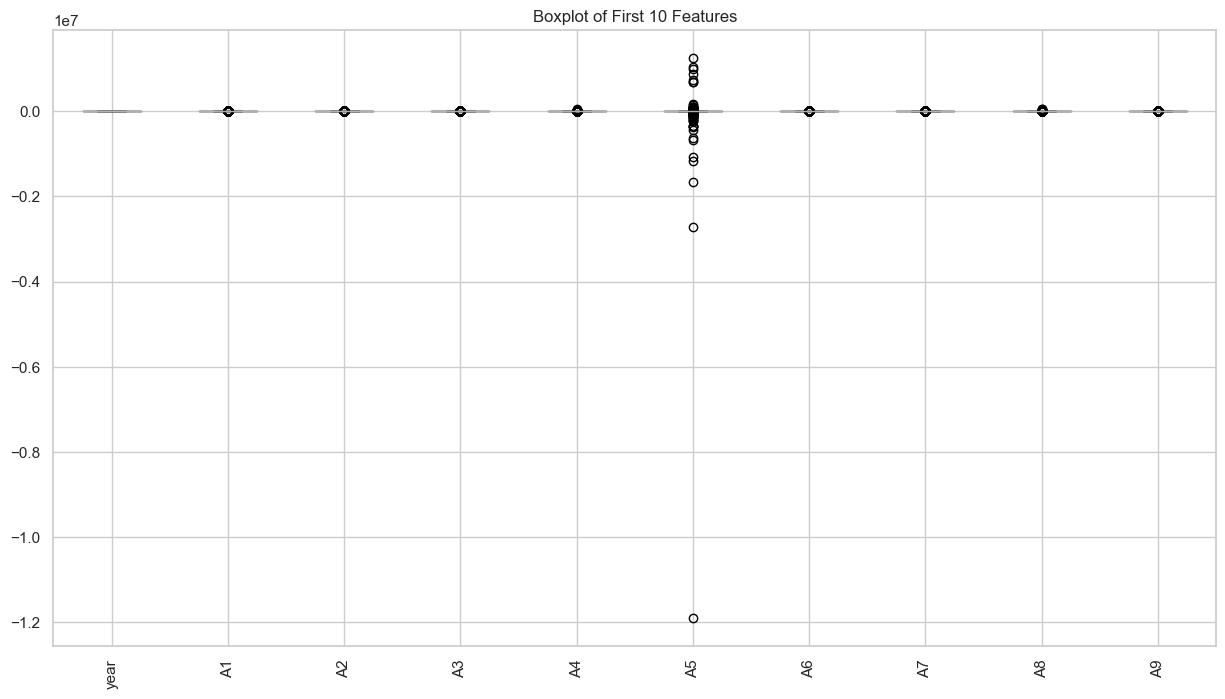

In [40]:
# Plot boxplots for first N features (e.g. 10)
print("\nBoxplots for First 10 Features to Visualize Outliers:")
cols_to_plot = X.columns[:10]
plt.figure(figsize=(15, 8))
X[cols_to_plot].boxplot(rot=90)
plt.title("Boxplot of First 10 Features")
plt.show()

## 6. Data Preprocessing

In [ ]:
# Get Non-Null Counts and Data Types
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43405 non-null  int64  
 1   A1      43397 non-null  float64
 2   A2      43397 non-null  float64
 3   A3      43397 non-null  float64
 4   A4      43271 non-null  float64
 5   A5      43316 non-null  float64
 6   A6      43397 non-null  float64
 7   A7      43397 non-null  float64
 8   A8      43311 non-null  float64
 9   A9      43396 non-null  float64
 10  A10     43397 non-null  float64
 11  A11     43361 non-null  float64
 12  A12     43271 non-null  float64
 13  A13     43278 non-null  float64
 14  A14     43397 non-null  float64
 15  A15     43369 non-null  float64
 16  A16     43310 non-null  float64
 17  A17     43311 non-null  float64
 18  A18     43397 non-null  float64
 19  A19     43277 non-null  float64
 20  A20     43278 non-null  float64
 21  A21     37551 non-null  float64
 22

In [ ]:
# Dropping the 'A37' column as it contains 24421 non-null values
X = X.drop(columns='A37')
# Get the shape after dropping the column
print(f"\nShape after dropping 'A37': {X.shape}")


Shape after dropping 'A37': (43405, 64)


(43405, 64)

In [31]:
# Fill missing values with median for numeric columns
X = X.fillna(X.median(numeric_only=True))

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43405 non-null  int64  
 1   A1      43405 non-null  float64
 2   A2      43405 non-null  float64
 3   A3      43405 non-null  float64
 4   A4      43405 non-null  float64
 5   A5      43405 non-null  float64
 6   A6      43405 non-null  float64
 7   A7      43405 non-null  float64
 8   A8      43405 non-null  float64
 9   A9      43405 non-null  float64
 10  A10     43405 non-null  float64
 11  A11     43405 non-null  float64
 12  A12     43405 non-null  float64
 13  A13     43405 non-null  float64
 14  A14     43405 non-null  float64
 15  A15     43405 non-null  float64
 16  A16     43405 non-null  float64
 17  A17     43405 non-null  float64
 18  A18     43405 non-null  float64
 19  A19     43405 non-null  float64
 20  A20     43405 non-null  float64
 21  A21     43405 non-null  float64
 22

In [43]:
# Handling Class Imbalance

# Split data first
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: class
0        33051
1         1673
dtype: int64
After SMOTE: class
0        33051
1        33051
dtype: int64


In [44]:
# Using StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


## 7. Model Selection & Development
This is a binary classification problem with imbalanced classes. We started with exploratory data analysis and preprocessing, including missing value imputation and feature scaling. Due to superior performance and ability to manage imbalance with hyperparameter tuning and feature selection, XGBoost was chosen as the final model.

In [ ]:
# Initial model for feature importance
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)

# Select important features
selector = SelectFromModel(xgb, threshold='median')  # or use threshold='mean'
X_train_sel = selector.transform(X_train_scaled)
X_test_sel = selector.transform(X_test_scaled)

print(f"Reduced features from {X_train_scaled.shape[1]} to {X_train_sel.shape[1]}")


Reduced features from 64 to 32


In [ ]:
# Perform Grid Search for Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_xgb.fit(X_train_sel, y_train)

print("Best Parameters:", grid_xgb.best_params_)
print("Best F1 Score:", grid_xgb.best_score_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1}
Best F1 Score: 0.7223107184484953


## 8. Model Performance Metrics
The model achieved high overall accuracy (98%) and excellent precision for both classes. While recall for the minority class (bankrupt) is moderate (60%), the F1-score of 0.73 indicates a good balance between precision and recall. The ROC AUC score of 0.97 confirms strong discriminatory power, making the model reliable for predicting bankruptcy despite class imbalance.

In [ ]:
best_model = grid_xgb.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test_sel)
y_proba = best_model.predict_proba(X_test_sel)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8263
           1       0.94      0.60      0.73       418

    accuracy                           0.98      8681
   macro avg       0.96      0.80      0.86      8681
weighted avg       0.98      0.98      0.98      8681

ROC AUC Score: 0.9733741293261539


## 9. Interpretation of Results and Business Insights
The model effectively identifies most non-bankrupt companies while reasonably detecting bankrupt ones, which is crucial for minimizing financial risk. Although recall for bankrupt firms can be improved, the high precision reduces false alarms, helping businesses focus on genuine risk cases. This predictive capability enables proactive decision-making, such as targeted credit reviews and risk management, ultimately reducing potential losses.